# RNN Model

In [ ]:
# Function to load data for a given time step
def load_data(time_steps):
    dir_path = f'/content/drive/MyDrive/NYSE_Dataset/time_steps_{time_steps}'
    X_train = np.load(os.path.join(dir_path, 'X_train.npy'))
    X_test = np.load(os.path.join(dir_path, 'X_test.npy'))
    y_train = np.load(os.path.join(dir_path, 'y_train.npy'))
    y_test = np.load(os.path.join(dir_path, 'y_test.npy'))
    return X_train, X_test, y_train, y_test


In [ ]:
def build_rnn_model(input_shape, neurons, learning_rate, optimizer_name):
    model = Sequential([
        SimpleRNN(neurons, activation='tanh', input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        SimpleRNN(neurons, activation='tanh'),
        Dropout(0.2),
        Dense(1)
    ])

    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
    elif optimizer_name == 'adamax':
        optimizer = tf.keras.optimizers.Adamax(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


## Define parameter for grid search and model training

In [ ]:
rnn_param_grid = {
    'neurons': [100, 200, 500],
    'learning_rate': [0.0001, 0.00005],
    'optimizer': ['adam', 'adamax']
}


In [ ]:
# List of time steps
time_steps_list = [1, 2, 5, 10]

# Base directory to save models
model_base_dir = '/content/drive/MyDrive/NYSE_Dataset/rnn_models'
if not os.path.exists(model_base_dir):
    os.makedirs(model_base_dir)

# Initialize early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Store results for each time step
all_results = {}

for time_steps in time_steps_list:
    print(f"\nProcessing time steps: {time_steps}")

    # Load the data
    X_train, X_test, y_train, y_test = load_data(time_steps)

    # Prepare to store results for the current time step
    results = []

    # Perform grid search
    for params in ParameterGrid(rnn_param_grid):
        print(f"Training with parameters: {params}")

        neurons = params['neurons']
        learning_rate = params['learning_rate']
        optimizer_name = params['optimizer']

        # Build the model
        model = build_rnn_model(input_shape=(X_train.shape[1], X_train.shape[2]),
                                neurons=neurons,
                                learning_rate=learning_rate,
                                optimizer_name=optimizer_name)

        # Train the model
        history = model.fit(X_train, y_train,
                            epochs=20,
                            batch_size=32,
                            validation_split=0.2,
                            callbacks=[early_stopping],
                            verbose=1)

        # Evaluate the model
        loss = model.evaluate(X_test, y_test)

        results.append({
            'params': params,
            'history': history,
            'loss': loss,
            'model': model
        })
        print(f"Test Loss: {loss}\n")

    # Find the best result for the current time step
    best_result = min(results, key=lambda x: x['loss'])
    all_results[time_steps] = best_result

    # Save the best model for the current time step
    best_model_path = os.path.join(model_base_dir, f'best_model_time_steps_{time_steps}.h5')
    best_result['model'].save(best_model_path)
    print(f"Saved best model for time steps {time_steps} at {best_model_path}")

    print(f"Best parameters for time steps {time_steps}: {best_result['params']}")
    print(f"Best loss for time steps {time_steps}: {best_result['loss']}")




Processing time steps: 1
Training with parameters: {'learning_rate': 0.0001, 'neurons': 100, 'optimizer': 'adam'}
Epoch 1/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1010 - val_loss: 0.0024
Epoch 2/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0171 - val_loss: 0.0016
Epoch 3/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0086 - val_loss: 0.0014
Epoch 4/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0051 - val_loss: 6.8458e-04
Epoch 5/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0035 - val_loss: 7.0823e-04
Epoch 6/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0024 - val_loss: 9.5207e-04
Epoch 7/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0017 - val_loss: 4.6896e-04
Epoch 8/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0012 - val_loss: 6.3133e-04
Epoch 9/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.5707e-04 - val_loss: 8.2823e-04
Epoch 10/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.

Test Loss: 0.0037402117159217596

Saved best model for time steps 1 at /content/drive/MyDrive/NYSE_Dataset/rnn_models/best_model_time_steps_1.h5
Best parameters for time steps 1: {'learning_rate': 0.0001, 'neurons': 200, 'optimizer': 'adam'}
Best loss for time steps 1: 6.310191383818164e-05

Processing time steps: 2
Training with parameters: {'learning_rate': 0.0001, 'neurons': 100, 'optimizer': 'adam'}
Epoch 1/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1499 - val_loss: 0.0010
Epoch 2/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0262 - val_loss: 5.6142e-04
Epoch 3/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0133 - val_loss: 0.0018
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Test Loss: 0.004554555285722017

Training with parameters: {'learning_rate': 0.0001, 'neurons': 100, 'optimizer': 'adamax'}
Epoch 1/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2176 - val_loss: 0.0033
Epoch 2/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - l

Test Loss: 0.015427440404891968

Saved best model for time steps 2 at /content/drive/MyDrive/NYSE_Dataset/rnn_models/best_model_time_steps_2.h5
Best parameters for time steps 2: {'learning_rate': 5e-05, 'neurons': 200, 'optimizer': 'adam'}
Best loss for time steps 2: 0.0005415034829638898

Processing time steps: 5
Training with parameters: {'learning_rate': 0.0001, 'neurons': 100, 'optimizer': 'adam'}
Epoch 1/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.2229 - val_loss: 0.0480
Epoch 2/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0489 - val_loss: 0.0074
Epoch 3/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0239 - val_loss: 0.0043
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1237
Test Loss: 0.15915808081626892

Training with parameters: {'learning_rate': 0.0001, 'neurons': 100, 'optimizer': 'adamax'}
Epoch 1/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3379 - val_loss: 0.0156
Epoch 2/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.

Test Loss: 0.033498115837574005

Saved best model for time steps 5 at /content/drive/MyDrive/NYSE_Dataset/rnn_models/best_model_time_steps_5.h5
Best parameters for time steps 5: {'learning_rate': 5e-05, 'neurons': 500, 'optimizer': 'adam'}
Best loss for time steps 5: 0.0019890114199370146

Processing time steps: 10
Training with parameters: {'learning_rate': 0.0001, 'neurons': 100, 'optimizer': 'adam'}
Epoch 1/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.1817 - val_loss: 0.0010
Epoch 2/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0405 - val_loss: 0.0019
Epoch 3/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0188 - val_loss: 4.9572e-04
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038
Test Loss: 0.008444584906101227

Training with parameters: {'learning_rate': 0.0001, 'neurons': 100, 'optimizer': 'adamax'}
Epoch 1/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.3267 - val_loss: 0.0561
Epoch 2/20
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - 

Test Loss: 0.0269632488489151

Saved best model for time steps 10 at /content/drive/MyDrive/NYSE_Dataset/rnn_models/best_model_time_steps_10.h5
Best parameters for time steps 10: {'learning_rate': 0.0001, 'neurons': 200, 'optimizer': 'adamax'}
Best loss for time steps 10: 0.0023412725422531366


In [ ]:
# Select the best time step based on the lowest loss
best_time_steps = min(all_results, key=lambda k: all_results[k]['loss'])
best_params = all_results[best_time_steps]['params']
print(f"\nBest time steps: {best_time_steps}")
print(f"Best parameters: {best_params}")



Best time steps: 1
Best parameters: {'learning_rate': 0.0001, 'neurons': 200, 'optimizer': 'adam'}


In [ ]:
# Define the best time step and parameters
rnn_best_time_steps = 1
rnn_best_model_path = f'/content/drive/MyDrive/NYSE_Dataset/rnn_models/best_model_time_steps_{rnn_best_time_steps}.h5'

# Load the data for the best time step
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = load_data(rnn_best_time_steps)

# Load the best model
rnn_best_model = load_model(rnn_best_model_path)

# Evaluate the best model
rnn_loss = rnn_best_model.evaluate(X_test, y_test)
print(f"Final Best Model (Time steps {rnn_best_time_steps}): Test Loss = {rnn_loss}")


381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9981e-05
Final Best Model (Time steps 1): Test Loss = 6.310191383818164e-05


## Visualization of Actual vs Predicted Values for RNN

381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


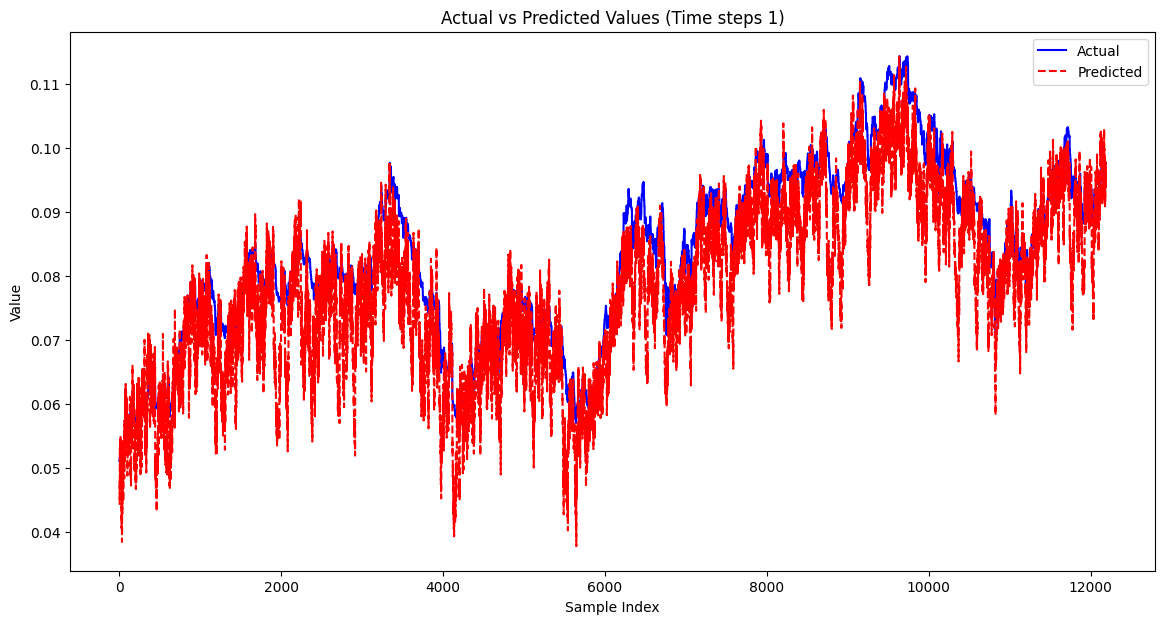

In [ ]:
# Make predictions on the test data
rnn_y_pred = rnn_best_model.predict(X_test_rnn)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))

# Plot the entire test data
plt.plot(np.arange(len(y_test_rnn)), y_test_rnn, color='blue', label='Actual')
plt.plot(np.arange(len(rnn_y_pred)), rnn_y_pred, color='red', linestyle='dashed', label='Predicted')

plt.title(f'Actual vs Predicted Values (Time steps {rnn_best_time_steps})')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Calculate Mean Error (ME)
rnn_me = np.mean(rnn_y_pred - y_test_rnn)

# Calculate Mean Squared Error (MSE)
rnn_mse = mean_squared_error(y_test_rnn, rnn_y_pred)

# Calculate Root Mean Squared Error (RMSE)
rnn_rmse = np.sqrt(rnn_mse)

# Calculate R-squared (R²)
rnn_r2 = r2_score(y_test_rnn, rnn_y_pred)

rnn_mae = mean_absolute_error(y_test_rnn, rnn_y_pred)

# Print the metrics
print(f"Mean Error (ME): {rnn_me}")
print(f"Mean Squared Error (MSE): {rnn_mse}")
print(f"Mean Absolute Error (MAE): {rnn_mae}")
print(f"Root Mean Squared Error (RMSE): {rnn_rmse}")
print(f"R-squared (R²): {rnn_r2}")


Mean Error (ME): -0.005964372270572592
Mean Squared Error (MSE): 6.310192377044045e-05
Mean Absolute Error (MAE): 0.00642962496988011
Root Mean Squared Error (RMSE): 0.007943671932452928
R-squared (R²): 0.6415013281738284


# XGBoost Model

## Pre-processing for XGBoost

In [ ]:
# Drop rows with any missing values
df_sf_clean = df_sf.dropna()

In [ ]:
# Remove the 'date' column and label encode 'symbol'
svm_df = df_sf_clean.drop(columns=['date'])
label_encoder = LabelEncoder()
svm_df['symbol'] = label_encoder.fit_transform(svm_df['symbol'])


X = svm_df.drop('close', axis=1)
y = svm_df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# MinMaxScaler the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Grid Search the model

In [ ]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10],
}

# Initialize the XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror')

# Setup GridSearchCV with cross-validation and verbosity
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 10],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Get the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative Mean Squared Error): {grid_search.best_score_:.2f}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Score (Negative Mean Squared Error): -9.12


In [ ]:
# import joblib


# # To load the model later
# best_model = joblib.load('/content/drive/MyDrive/NYSE_Dataset/xg_boost_best_model.pkl')


In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_


# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate Mean Error (ME)
xg_mean_error = np.mean(y_pred - y_test)

# Calculate Mean Squared Error (MSE)
xg_mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
xg_rmse = np.sqrt(xg_mse)

# Calculate Mean Absolute Error (MAE)
xg_mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²)
xg_r_squared = r2_score(y_test, y_pred)

# Print the metrics
print(f"Test Set Mean Error (ME): {xg_mean_error:.2f}")
print(f"Test Set Mean Squared Error (MSE): {xg_mse:.2f}")
print(f"Test Set Mean Absolute Error (MAE): {xg_mae:.2f}")
print(f"Test Set Root Mean Squared Error (RMSE): {xg_rmse:.2f}")
print(f"Test Set R-squared (R²): {xg_r_squared:.2f}")



Test Set Mean Error (ME): 0.00
Test Set Mean Squared Error (MSE): 6.06
Test Set Mean Absolute Error (MAE): 0.37
Test Set Root Mean Squared Error (RMSE): 2.46
Test Set R-squared (R²): 1.00


In [ ]:
# import joblib

# # Save the best model to a file
# joblib.dump(best_model, '/content/drive/MyDrive/NYSE_Dataset/xg_boost_best_model.pkl')


['/content/drive/MyDrive/NYSE_Dataset/xg_boost_best_model.pkl']

# Comparision of the Three Best Models

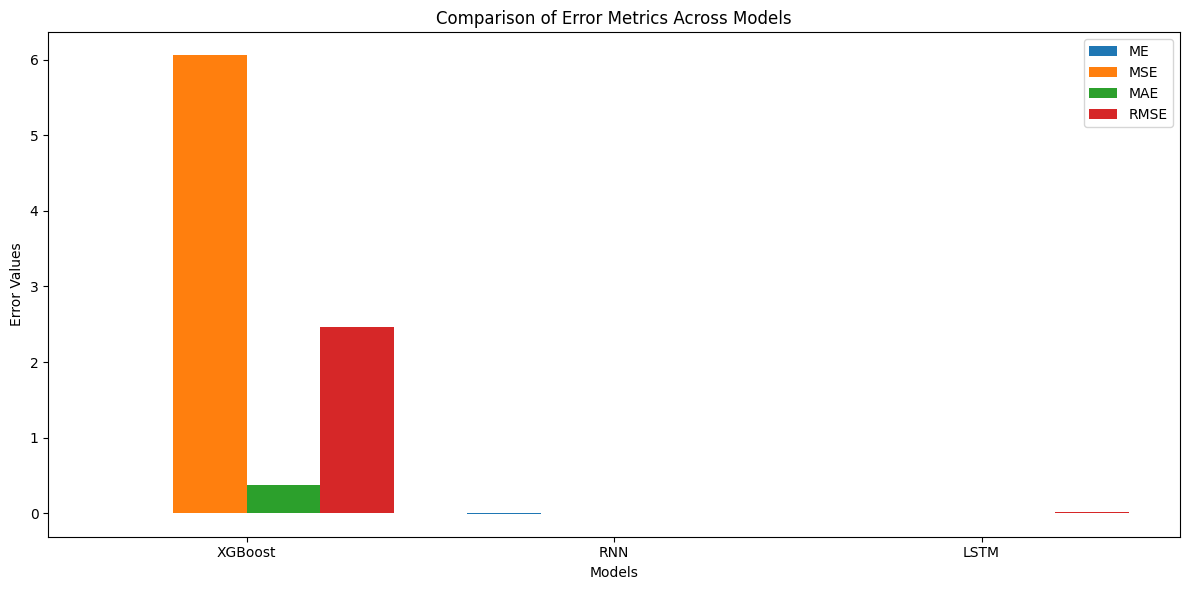

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['XGBoost', 'RNN', 'LSTM']
metrics = {
    'ME': [xg_mean_error, rnn_me, lstm_me],
    'MSE': [xg_mse, rnn_mse, lstm_mse],
    'MAE': [xg_mae, rnn_mae, lstm_mae],
    'RMSE': [xg_rmse, rnn_rmse, lstm_rrmse]
}

# Number of models and metrics
num_models = len(models)
num_metrics = len(metrics)

# Set up the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = np.arange(num_models)

# Create bars for each metric
for i, (metric, values) in enumerate(metrics.items()):
    bars = ax.bar(index + i * bar_width, values, bar_width, label=metric)

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Error Values')
ax.set_title('Comparison of Error Metrics Across Models')
ax.set_xticks(index + bar_width * (num_metrics / 2 - 0.5))
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


# After Compairsion LSTM is the best model among them